# Building Quantum Circuits

## Introduction
Welcome to this tutorial on building quantum circuits with Qamomile! While Qamomile is primarily designed for quantum optimization tasks, it also offers powerful capabilities for constructing arbitrary quantum circuits. This tutorial will guide you through the process of creating and manipulating quantum circuits using Qamomile's unique intermediate representation.


## Prerequisites
Before we begin, make sure you have:

- Qamomile Installed in your Python Environment


## Getting Started
First, let's import the necessary modules from Qamomile:

In [1]:
import qamomile.core as qm

## Creating a Quantum Circuit
To create a quantum circuit in Qamomile, we start by initializing quantum and classical registers, then use these to create a QuantumCircuit object:

In [2]:
circuit = qm.circuit.QuantumCircuit(2)  # Create a quantum circuit with 2 qubits

## Adding Gates to the Circuit
Qamomile supports a wide range of quantum gates. Let's add some common gates to our circuit:

In [3]:
# Apply Hadamard gate to the first qubit
circuit.h(0)

# Apply CNOT gate with first qubit as control and second as target
circuit.cx(0, 1)

# Apply X-gate to the second qubit
circuit.x(1)

The quantum gates supported by Qamomile can be found at the following link: 
https://jij-inc.github.io/Qamomile/autoapi/core/circuit/circuit/index.html#core.circuit.circuit.QuantumCircuit

## Measurements
To perform measurements in Qamomile:

In [4]:
circuit.measure_all()

## Visualizing the Circuit
Qamomile provides a method to visualize the quantum circuit:

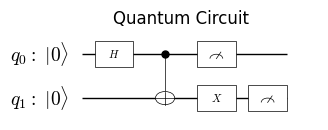

In [5]:
from qamomile.core.circuit.drawer import plot_quantum_circuit

plot_quantum_circuit(circuit)

## Circuit Composition

You can combine smaller circuits to create more complex ones:

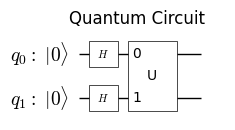

In [6]:
# Create two separate circuits
circuit1 = qm.circuit.QuantumCircuit(2)
circuit1.h(0)
circuit1.h(1)

circuit2 = qm.circuit.QuantumCircuit(2)
circuit2.cx(0, 1)


circuit1.append(circuit2)

plot_quantum_circuit(circuit1)

By specifying the `decompose_level` when plotting, you can display the circuit in more detail.

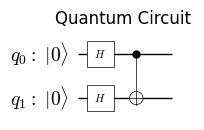

In [7]:
plot_quantum_circuit(circuit1, decompose_level=1)

## Executing the Quantum Circuit

While Qamomile itself doesn't have the functionality to execute quantum circuits, it can translate the circuit to other quantum SDKs for execution.

### Qiskit Backend

Here's how you can execute a Qamomile circuit using Qiskit:

1- First import the necessary modules:

In [8]:
from qamomile.qiskit import QiskitTranspiler
import qiskit.primitives as qk_pr

2- Create a QiskitTranspiler object:

In [9]:
qk_transpiler = QiskitTranspiler()

3- Trasnpile your Qamomile circuit to a Qiskit circuit:

In [10]:
qk_circuit = qk_transpiler.transpile_circuit(circuit)

4- Now you can use Qiskit's functionality to execute the circuit. For example, to run the circuit on a simulator:

In [11]:
simulator = qk_pr.StatevectorSampler()
job = simulator.run([qk_circuit], shots=1000)
result = job.result()

5- The results can then be processed and analyzed using Qiskit's tools:

In [12]:
result[0].data['c'].get_counts()

{'10': 494, '01': 506}

### QURI-Parts with Qulacs Backend

Here's how you can execute a Qamomile circuit using QURI-Parts with Qulacs.

Execute the quantum circuit by converting it in the same way as Qiskit.

In [13]:
from qamomile.quri_parts import QuriPartsTranspiler

# Transpile the circuit to QURI-Parts
qp_transpiler = QuriPartsTranspiler()
qp_circuit = qp_transpiler.transpile_circuit(circuit)

Now you can use Qulacs to execute the circuit:

In [14]:
from quri_parts.core.state import quantum_state, apply_circuit
from quri_parts.qulacs.sampler import create_qulacs_vector_sampler

sampler = create_qulacs_vector_sampler()
sampling_result = sampler(qp_circuit, 1000)

In [15]:
sampling_result

Counter({1: 501, 2: 499})

### Pennylane Backend

Here's how you can execute a Qamomile circuit using Pennylane.

Execute the quantum circuit by converting it in the same way as Qiskit.

In [16]:
from qamomile.pennylane import PennylaneTranspiler

# Transpile the circuit to Pennylane
qml_transpiler = PennylaneTranspiler()
qml_circuit_func = qml_transpiler.transpile_circuit(circuit)

In [17]:
import pennylane as qml

dev = qml.device("default.qubit", wires=circuit.num_qubits, shots=1000)
@qml.qnode(dev)
def qml_circuit(params):
    qml_circuit_func(params)
        
    return qml.counts()

In [18]:
qml_circuit(None)

{'01': 483, '10': 517}

## Conclusion

This tutorial has introduced you to building quantum circuits using Qamomile's intermediate representation and executing them using Qiskit and QURI-Parts. While Qamomile's primary focus is on quantum optimization, these circuit-building capabilities provide flexibility for various quantum computing tasks.  
Happy quantum computing with Qamomile!